# Operações espaciais no processamento de imagens com OpenCV

- Filtros Lineares
    - Filtering Noise
    - Gaussian Blur
    - Image Sharpening
- Edges
- Median

In [13]:
# Used to view the images
import matplotlib.pyplot as plt
# Used to perform filtering on an image
import cv2
# Used to create kernels for filtering
import numpy as np

In [38]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

### Filtros Lineares

A Convolução é um tipo de filtro de imagem. O filtro é chamado de kernel e kernels diferentes realizam tarefas diferentes. Além disso, a Convolução é usada para muitos dos algoritmos de inteligência artificial mais avançados. Simplesmente pegamos o produto escalar do kernel e uma porção de tamanho igual da imagem. Então, deslocamos o kernel e repetimos.


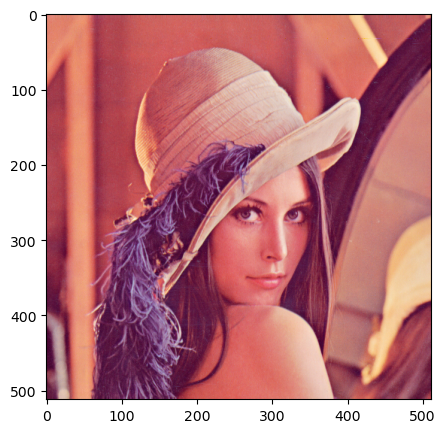

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


In [15]:
# Carregando e renderizando a imagem
image = cv2.imread("./img/lenna.png")
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

print(image)

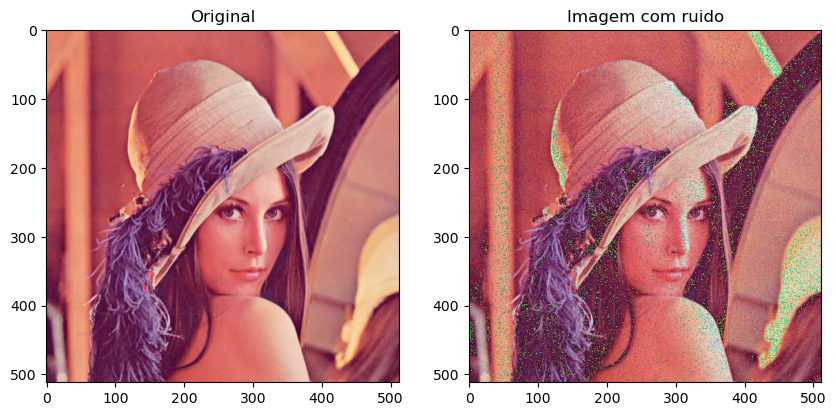

In [16]:
#linhas e colunas da imagem
rows, cols, chanels = image.shape

# Cria valores usando uma distribuição normal com média de 0 e desvio padrão de 15, 
# os valores são convertidos para unidade8, o que significa que os valores estão entre 0 e 255
noise = np.random.normal(0,15,(rows,cols, 3)).astype(np.uint8)

#adicionando o ruido na imagem
noise_img = image + noise

plot_image(image, noise_img, "Original", "Imagem com ruido")



Filtrando Ruidos

Os filtros de passa-baixa ou filtros de suavização fazem a media do pixels de vizinhança. Para filtragem média, o kernel simplesmente faz a média dos kernels em uma vizinhança.

A função <code>filter2D</code> realiza convolução 2D entre a imagem <code>src</code> e o <code>kernel</code> em cada canal de cor independentemente. O parâmetro <a href="https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#filter_depths">ddepth</a> tem a ver com o tamanho da imagem de saída, vamos defini-lo como -1 para que a entrada e a saída tenham o mesmo tamanho.

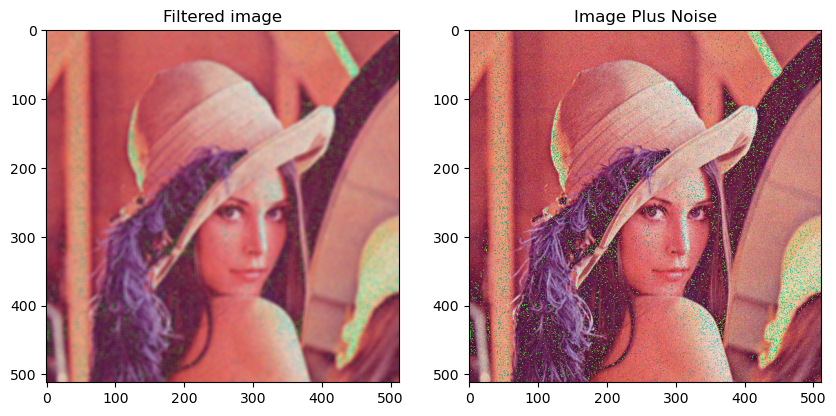

In [20]:
#O Kernel é um array 6x6, com valores iguais a 1/36
kernel = np.ones((6,6))/36

#filtrando a imagem a partir do kernel
image_filter = cv2.filter2D(src=noise_img, ddepth=-1, kernel=kernel)

#plotando o resultado
plot_image(image_filter, noise_img,title_1="Filtered image",title_2="Image Plus Noise")

A função FIlter realiza a convolução entre uma imagem e kernel em cada canal de cores, de forma independente

Um kernel menor mantém a imagem mais nítida, mas filtra menos o ruído. Aqui, experimentamos um kernel de 4x4

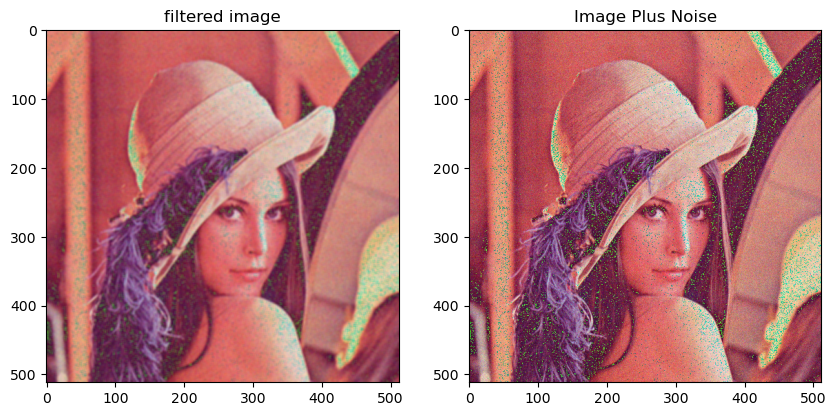

In [21]:
# Creates a kernel which is a 4 by 4 array where each value is 1/16
kernel = np.ones((4,4))/16
# Filters the images using the kernel
image_filtered=cv2.filter2D(src=noise_img,ddepth=-1,kernel=kernel)
# Plots the Filtered and Image with Noise using the function defined at the top
plot_image(image_filtered , noise_img,title_1="filtered image",title_2="Image Plus Noise")

### Desfoque Gaussiano

 image using the predefined filter GaussianBlur

Parameters

<p><code>src</code> input image; the image can have any number of channels, which are processed independently</p>
<p><code>ksize:</code> Gaussian kernel size</p>
<p><code>sigmaX</code> Gaussian kernel standard deviation in the X direction</p>
<p><code>sigmaY</code> Gaussian kernel standard deviation in the Y direction; if sigmaY is zero, it is set to be equal to sigmaX </p>



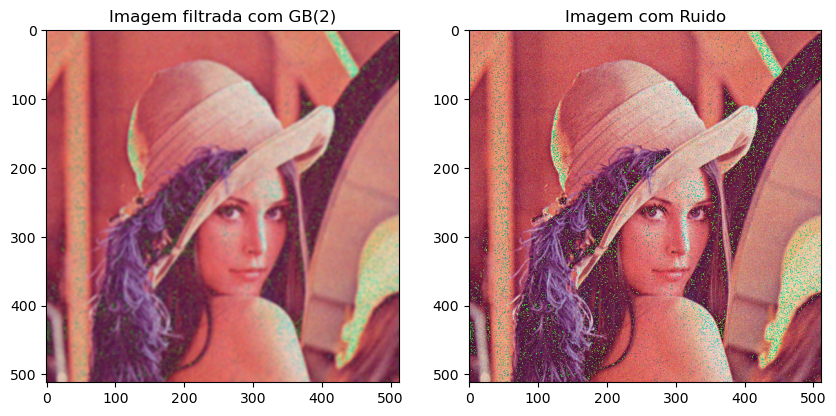

In [ ]:
#aplicando o desfoque gaugassiano
imagem_filt_gauss = cv2.GaussianBlur(noise_img, (5,5), sigmaX=4,sigmaY=4)

plot_image(imagem_filt_gauss, noise_img, "Imagem filtrada com GB(4)", "Imagem com Ruido")

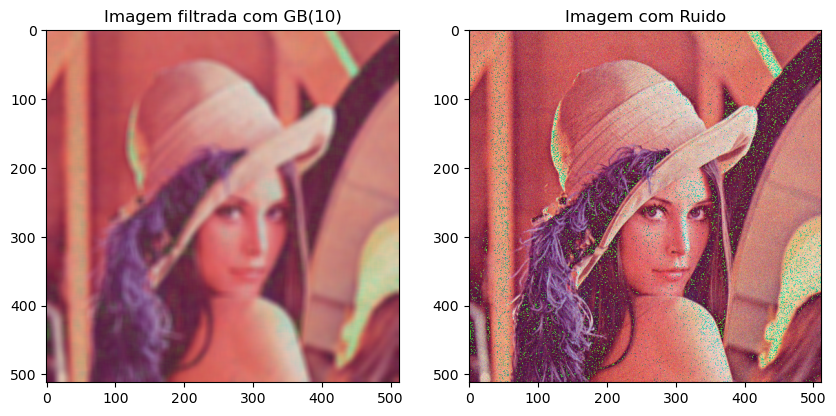

In [24]:
#aplicando o desfoque gaugassiano
imagem_filt_gauss = cv2.GaussianBlur(noise_img, (11,11), sigmaX=10,sigmaY=10)

plot_image(imagem_filt_gauss, noise_img, "Imagem filtrada com GB(10)", "Imagem com Ruido")

### Nitidez

A nitidez de imagem envolve suavizar a imagem e calcular as derivadas. Podemos realizar a nitidez de imagem aplicando o seguinte Kernel.

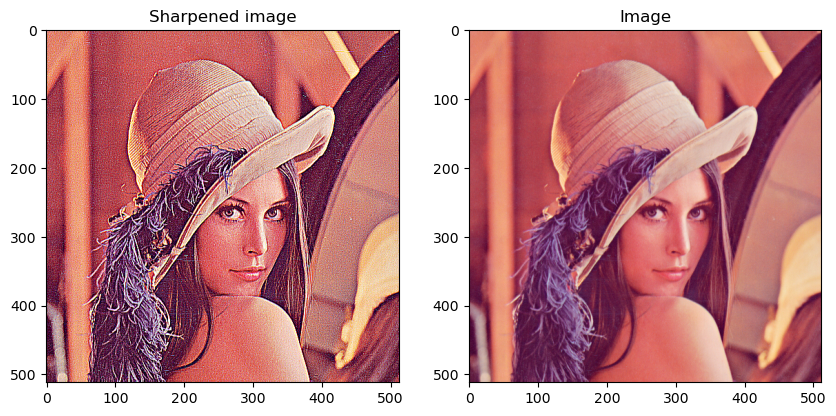

In [25]:
# kernel de nitides
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
# Applys the sharpening filter using kernel on the original image without noise
sharpened = cv2.filter2D(image, -1, kernel)
# Plots the sharpened image and the original image without noise
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

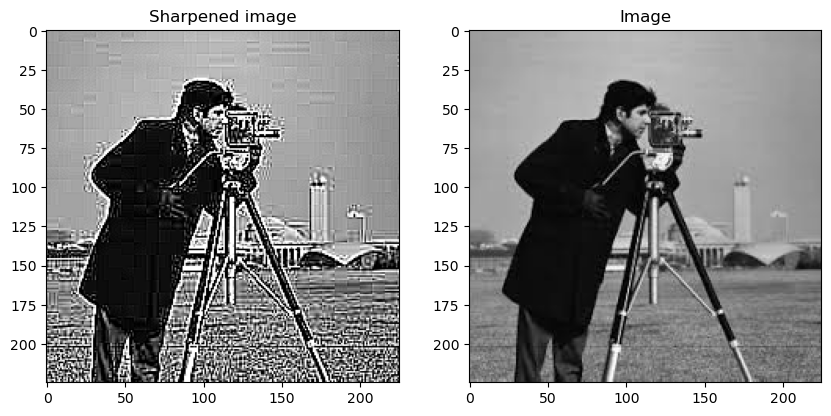

In [28]:
image_cam =cv2.imread("./img/cameraman.jpeg")

nitidez = cv2.filter2D(image_cam, -1, kernel)
plot_image(nitidez , image_cam, title_1="Sharpened image",title_2="Image")


### Bordas

As bordas são onde as intensidades dos pixels mudam. O Gradiente de uma função produz a taxa de mudança; podemos aproximar o gradiente de uma imagem em tons de cinza com convolução. =

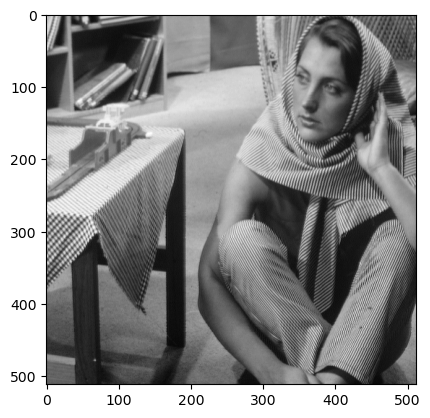

[[181 201 202 ... 103 102  92]
 [171 198 201 ...  94  96  96]
 [175 195 193 ...  87  96  98]
 ...
 [100  97  97 ... 114 113 117]
 [ 94  97  99 ... 111 112 114]
 [ 96  95  98 ... 113 104 109]]


In [31]:
img_cinza = cv2.imread("./img/barbara.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_cinza, cmap="gray")
plt.show()

print(img_cinza)

Acentuamos as bordas para que sejam melhor captadas quando usamos a detecção de bordas

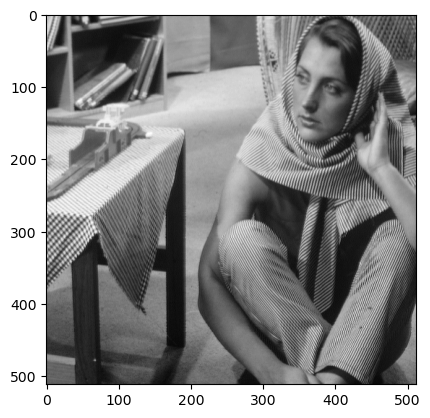

In [32]:
#filtando com o GaussianBlur e kernel 3x3
img_cinza =  cv2.GaussianBlur(img_cinza,(3,3),sigmaX=0.1,sigmaY=0.1)
plt.imshow(img_cinza, cmap="gray")
plt.show()

Podemos aproximar a derivada nas direções X e Y usando a função Sobel, cujo parâmetros são:

<p><code>src</code>: imagem de entrada</p>
<p><code>ddepth</code>: profundidade dos dados da imagem gerada, see combinations; in the case of 8-bit input images it will result in truncated derivatives</p>
<p><code>dx</code>: ordem da derivada em X x</p>
<p><code>dx</code>: ordem da derivada em y</p>
<p><code>ksize</code> tamanho da extensão do Kernel Sobel; it must be 1, 3, 5, or 7</p>



dx = 1 representa a derivada na direção x. A função aproxima a derivada convolvendo a imagem com o seguinte kernel

\begin{bmatrix} 
1 & 0 & -1 \\\\\\
2 & 0 & -2 \\\\
1 & 0 & -1 
\end{bmatrix}


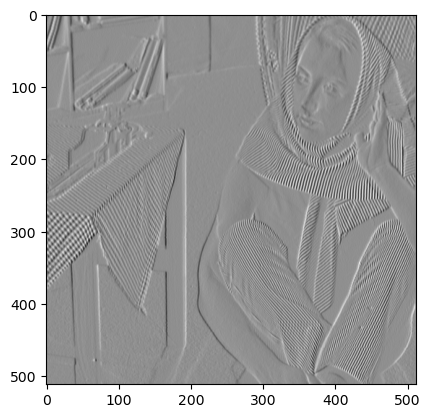

In [35]:
#CV_16S (16 bits com sinal): Permite representar valores negativos e positivos. 
# Isso é útil porque os gradientes podem ser negativos.
ddepth = cv2.CV_16S
# Applys the filter on the image in the X direction
grad_x = cv2.Sobel(src=img_cinza, ddepth=ddepth, dx=1, dy=0, ksize=3)

plt.imshow(grad_x,cmap='gray')
plt.show()

dy = 1 representa a derivada na direção y. A função aproxima a derivada convolvendo a imagem com o seguinte kernel

\begin{bmatrix} 
1 & 2 & 1 \\\\\\
0 & 0 & 0 \\\\
-1 & -2 & -1 
\end{bmatrix}

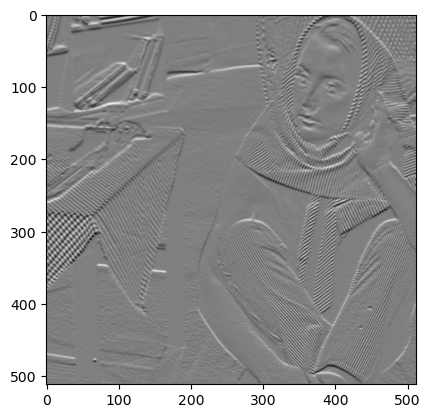

In [36]:
# Applys the filter on the image in the X direction
grad_y = cv2.Sobel(src=img_cinza, ddepth=ddepth, dx=0, dy=1, ksize=3)
plt.imshow(grad_y,cmap='gray')
plt.show()

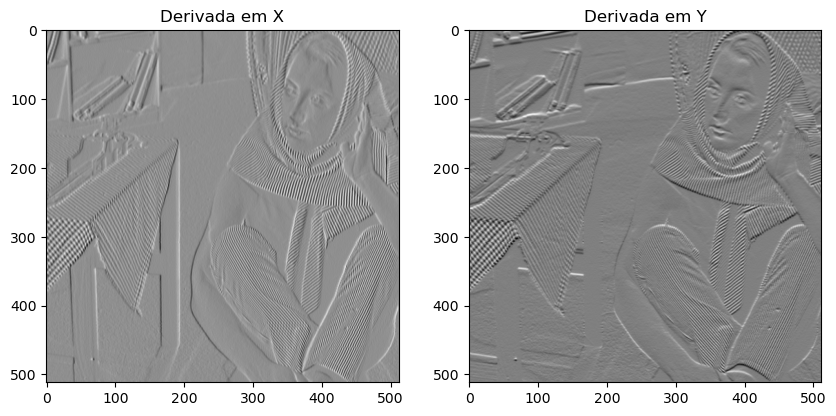

In [40]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(grad_x, cmap="gray")
plt.title("Derivada em X")
plt.subplot(1, 2, 2)
plt.imshow(grad_y, cmap="gray")
plt.title("Derivada em Y")
plt.show()

Aproximação do gradiante usando os valores absolutos e convertendo os resultados em 8 bits

In [41]:
# Converts the values back to a number between 0 and 255
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

Uso da função addWeighted para realizar a soma dos dois arrays( x e y)

In [42]:
# Adds the derivative in the X and Y direction
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

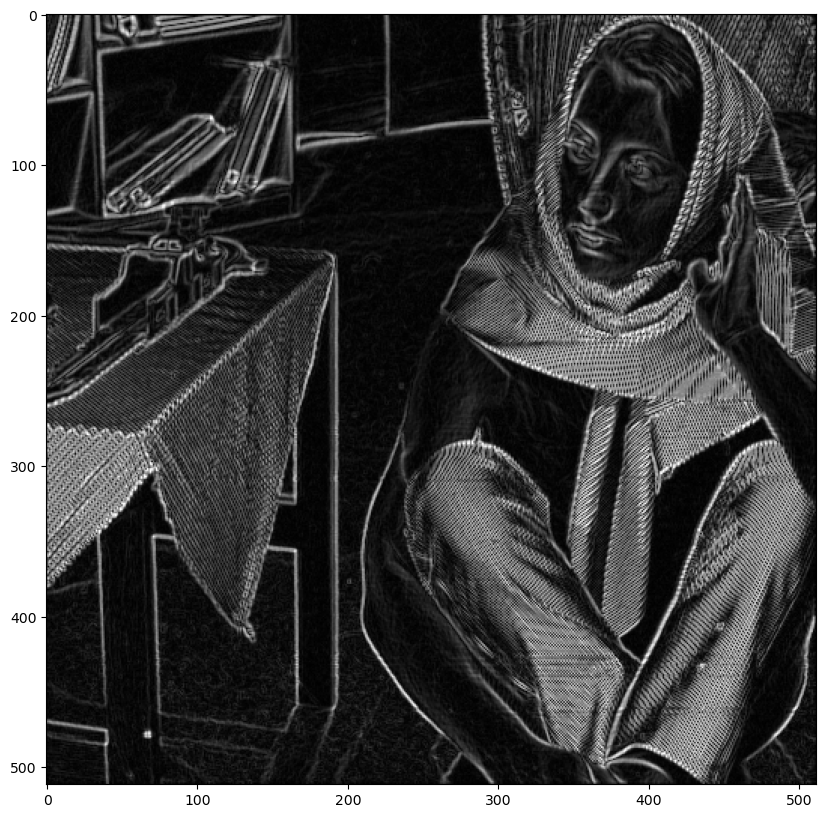

In [43]:
# Make the figure bigger and renders the image
plt.figure(figsize=(10,10))
plt.imshow(grad,cmap='gray')

### Median

Os filtros de mediana encontram a mediana de todos os pixels sob a área do kernel e o elemento central é substituído por esse valor mediano.

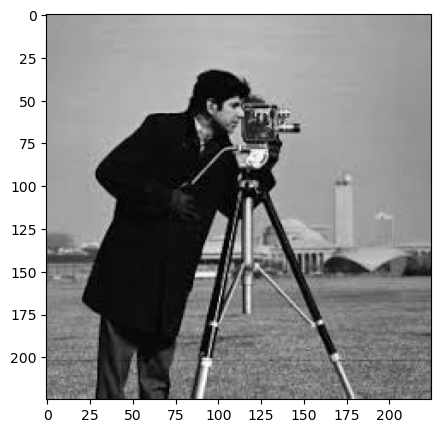

In [45]:
image_cam = cv2.imread("cameraman.jpeg",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5,5))
plt.imshow(image_cam, cmap="gray")
plt.show()

Uso da função medianBlur, cujo parâmetros são SRC: a imagem a ser utilizada; ksize: tamanho do kernel a ser aplicado

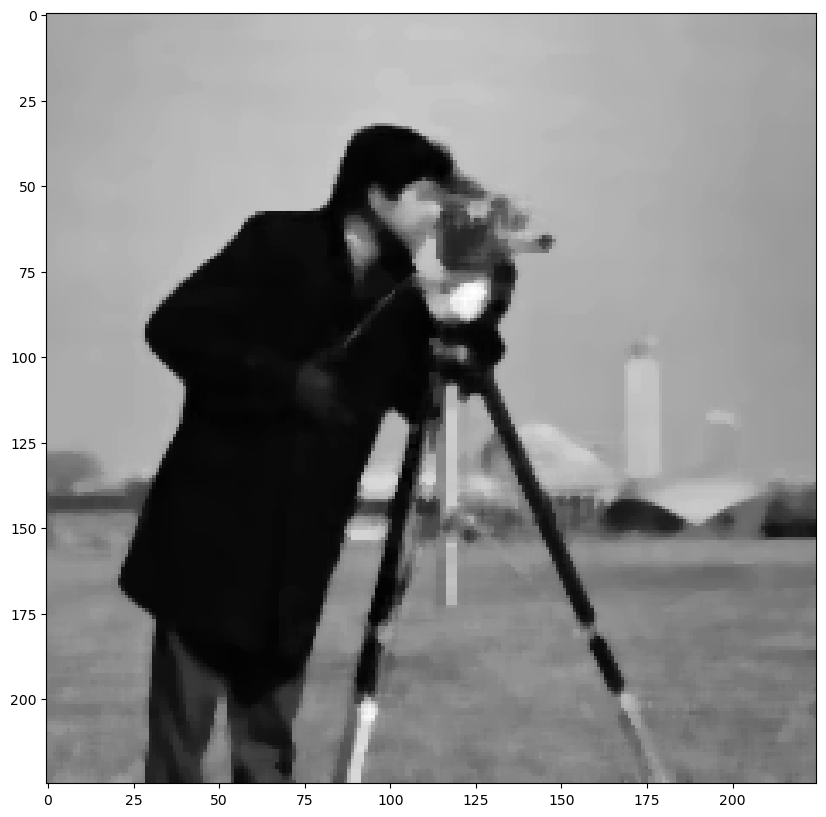

In [46]:
# Filter the image using Median Blur with a kernel of size 5
filtered_image = cv2.medianBlur(image_cam, 5)
# Make the image larger when it renders
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(filtered_image,cmap="gray")

### Parâmetros da Função de Threshold (Limite)

`src`: A imagem a ser utilizada
`thresh`: O limite
`maxval`: O valor máximo a ser utilizado
`type`: Tipo de filtragem

A função de threshold funciona analisando o valor em escala de cinza de cada pixel e atribuindo um valor dependendo de estar abaixo ou acima do limite. No nosso exemplo, o limite é 0 (preto) e o tipo é binário inverso. Isso significa que, se o valor for acima do limite, o valor atribuído será 0 (preto), e se estiver abaixo ou igual ao limite, será usado o valor máximo, 255 (branco). Assim, se o pixel for 0 (preto), ele será atribuído como 255 (branco); e se o pixel não for preto, ele será atribuído como preto, que é exatamente o que o parâmetro THRESH_BINARY_INV instrui o OpenCV a fazer. É assim que funciona sem o uso de THRESH_OTSU.

Como estamos usando THRESH_OTSU, isso significa que o OpenCV determinará um limite ideal automaticamente. No exemplo abaixo, o limite fornecido não será usado no filtro, pois o OpenCV calculará um limite ótimo.

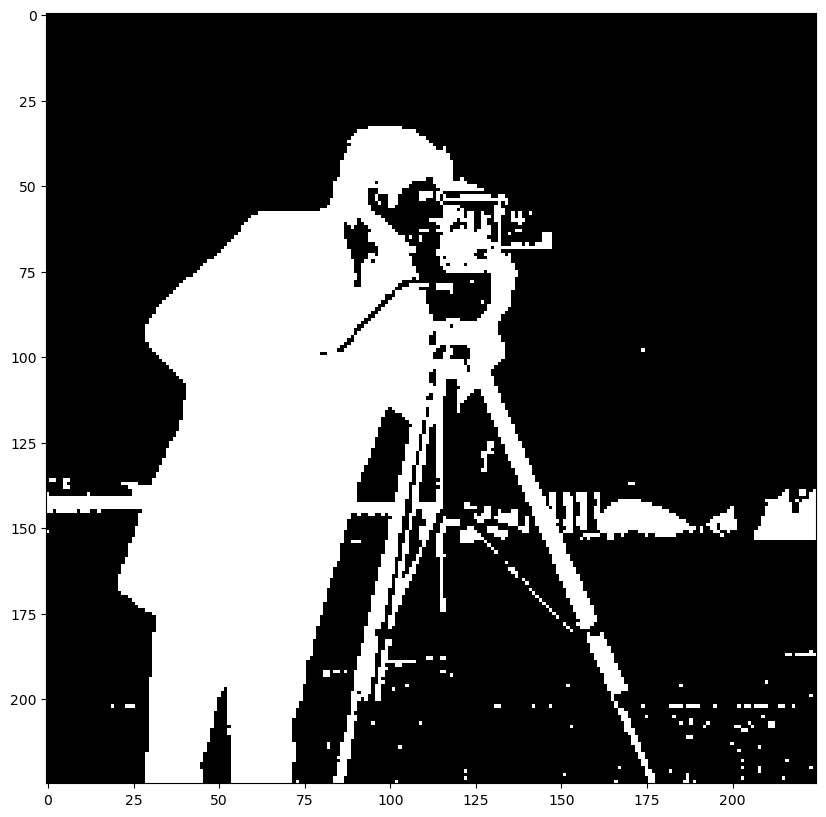

In [47]:
# Returns ret which is the threshold used and outs which is the image
ret, outs = cv2.threshold(src = image_cam, thresh = 0, maxval = 255, type = cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)

# Make the image larger when it renders
plt.figure(figsize=(10,10))

# Render the image
plt.imshow(outs, cmap='gray')